In [512]:
from random import random
import os
import subprocess
from functools import partial
import math
# import json
import re
import inspect

import numpy as np
from PIL import Image, ExifTags
import matplotlib.pyplot as plt
%matplotlib inline

In [281]:
# index lookup for zigzag pattern
zigzag = [
   0,  1,  5,  6, 14, 15, 27, 28,
   2,  4,  7, 13, 16, 26, 29, 42,
   3,  8, 12, 17, 25, 30, 41, 43,
   9, 11, 18, 24, 31, 40, 44, 53,
  10, 19, 23, 32, 39, 45, 52, 54,
  20, 22, 33, 38, 46, 51, 55, 60,
  21, 34, 37, 47, 50, 56, 59, 61,
  35, 36, 48, 49, 57, 58, 62, 63
]

![zigzag](Dctjpeg.png)
![zigzag](zigzag.png)

In [299]:
def writeTable(lumaMat, chromaMat):
    def prepString(mat):
        return str(mat).replace('[', '').replace(']', '')
    
    lumaStr = prepString(lumaMat)
    chromaStr = prepString(chromaMat)
    with open('tables.txt', 'w') as f:
        f.write(f'{lumaStr}\n\n{chromaStr}')

        
def printPipeOutput(output):
    for line in output.decode('utf-8').split('\n'):
        print(line)

jpeg-9d/cjpeg -grayscale -baseline  -outfile output-0.jpg -huffTableMultiplier 0.85 "/Users/freder/Downloads/_work-jobs-etc/projects/jpeg-9/_output/kim.tga"


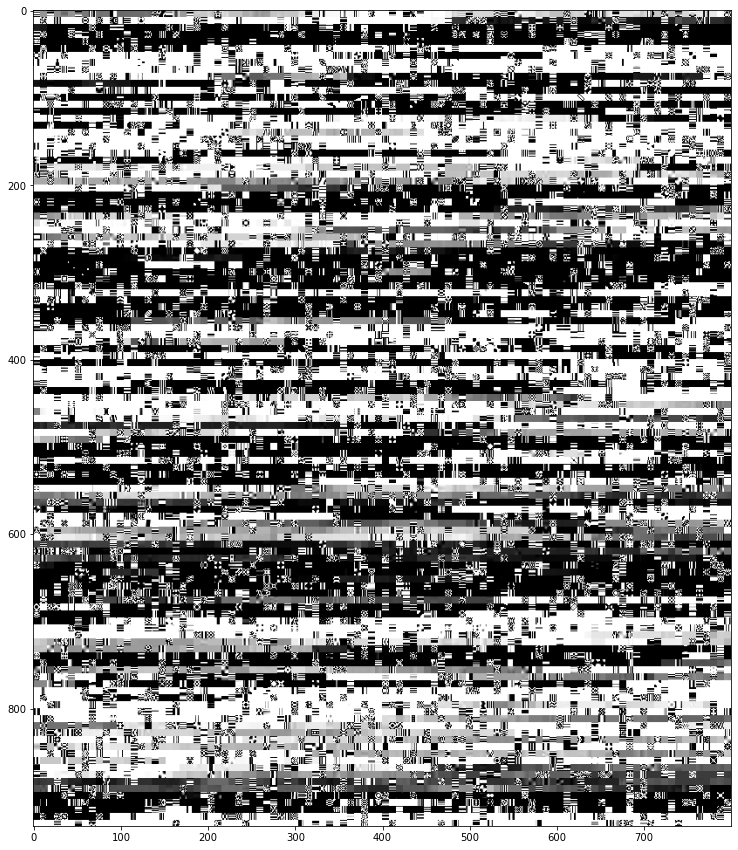

-----------------------------------
jpeg-9d/cjpeg -grayscale -baseline  -outfile output-1.jpg -huffTableMultiplier 0.85 "/Users/freder/Downloads/_work-jobs-etc/projects/jpeg-9/_output/kim.tga"


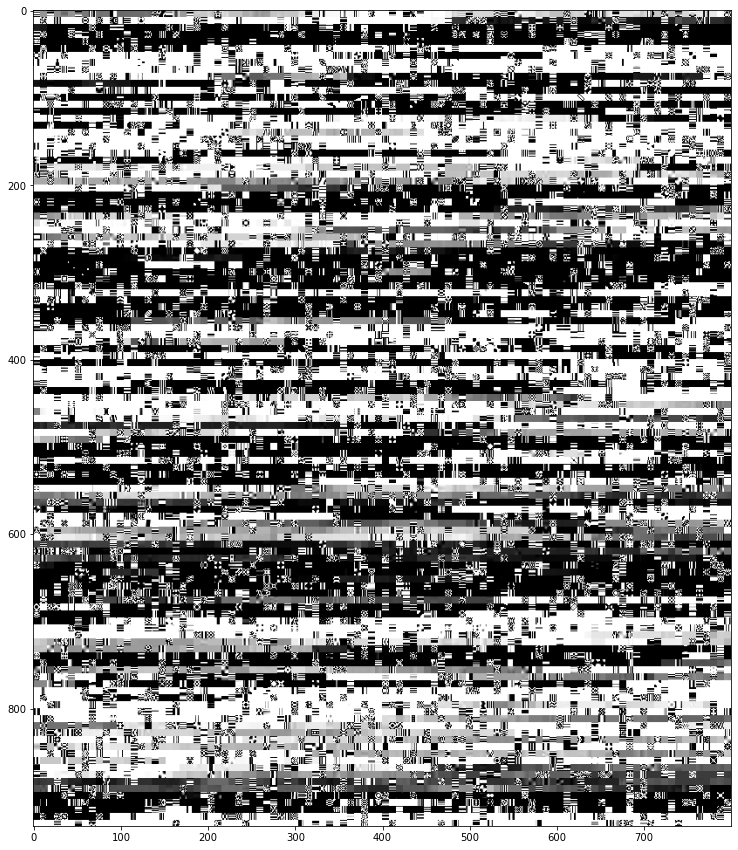

-----------------------------------
jpeg-9d/cjpeg -grayscale -baseline  -outfile output-2.jpg -huffTableMultiplier 0.85 "/Users/freder/Downloads/_work-jobs-etc/projects/jpeg-9/_output/kim.tga"


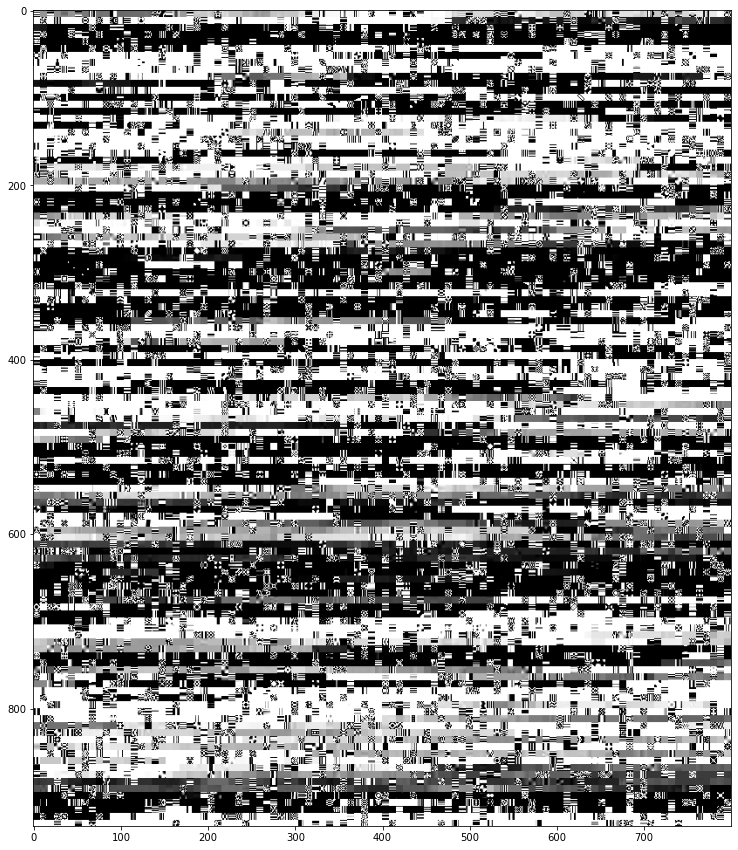

-----------------------------------
jpeg-9d/cjpeg -grayscale -baseline  -outfile output-3.jpg -huffTableMultiplier 0.85 "/Users/freder/Downloads/_work-jobs-etc/projects/jpeg-9/_output/kim.tga"


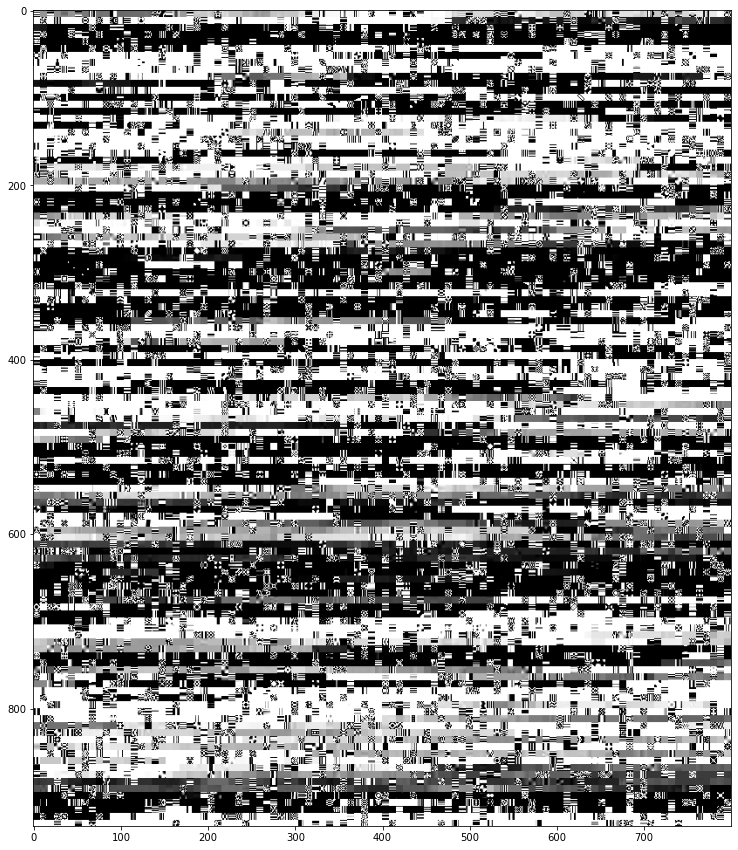

-----------------------------------
jpeg-9d/cjpeg -grayscale -baseline  -outfile output-4.jpg -huffTableMultiplier 0.85 "/Users/freder/Downloads/_work-jobs-etc/projects/jpeg-9/_output/kim.tga"


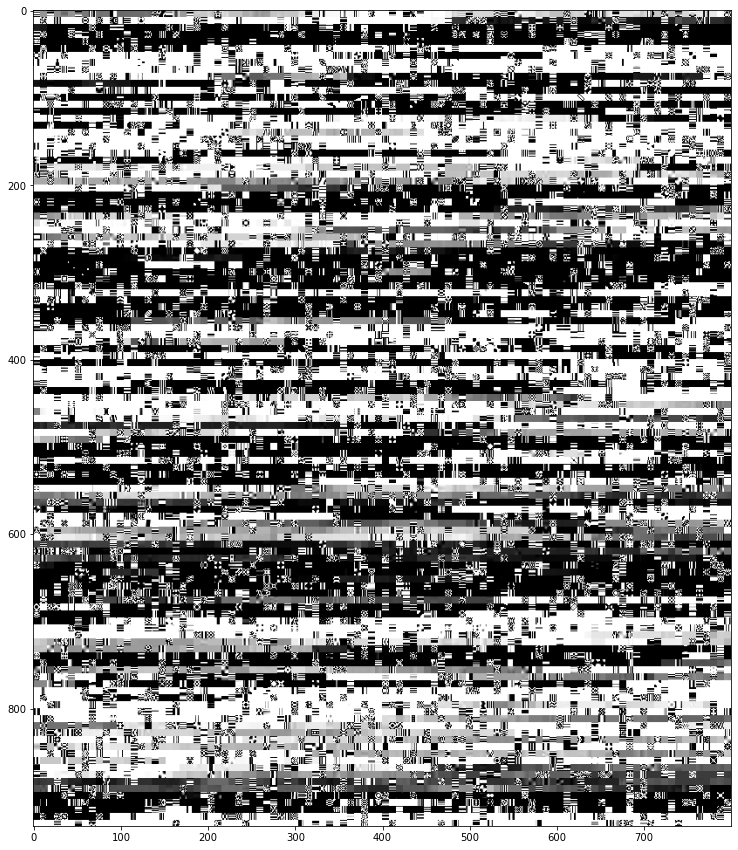

-----------------------------------
jpeg-9d/cjpeg -grayscale -baseline  -outfile output-5.jpg -huffTableMultiplier 0.85 "/Users/freder/Downloads/_work-jobs-etc/projects/jpeg-9/_output/kim.tga"


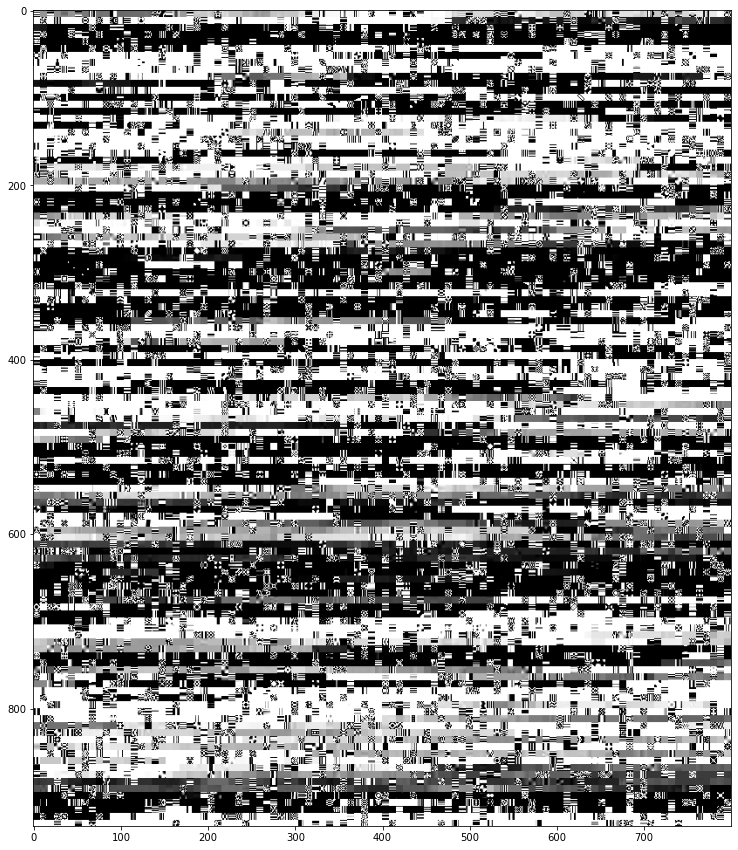

-----------------------------------
jpeg-9d/cjpeg -grayscale -baseline  -outfile output-6.jpg -huffTableMultiplier 0.85 "/Users/freder/Downloads/_work-jobs-etc/projects/jpeg-9/_output/kim.tga"


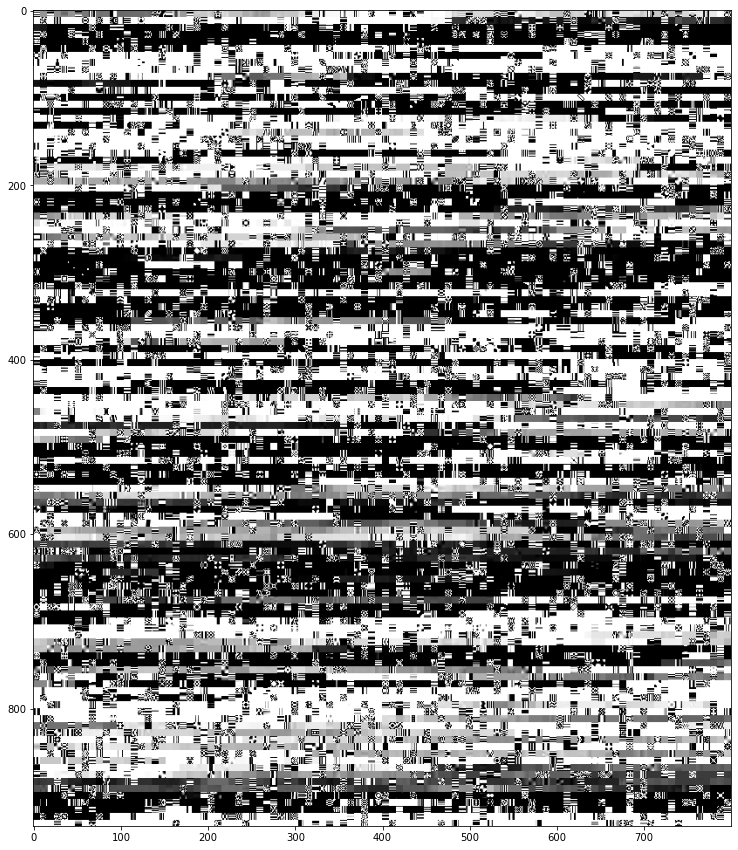

-----------------------------------
jpeg-9d/cjpeg -grayscale -baseline  -outfile output-7.jpg -huffTableMultiplier 0.85 "/Users/freder/Downloads/_work-jobs-etc/projects/jpeg-9/_output/kim.tga"


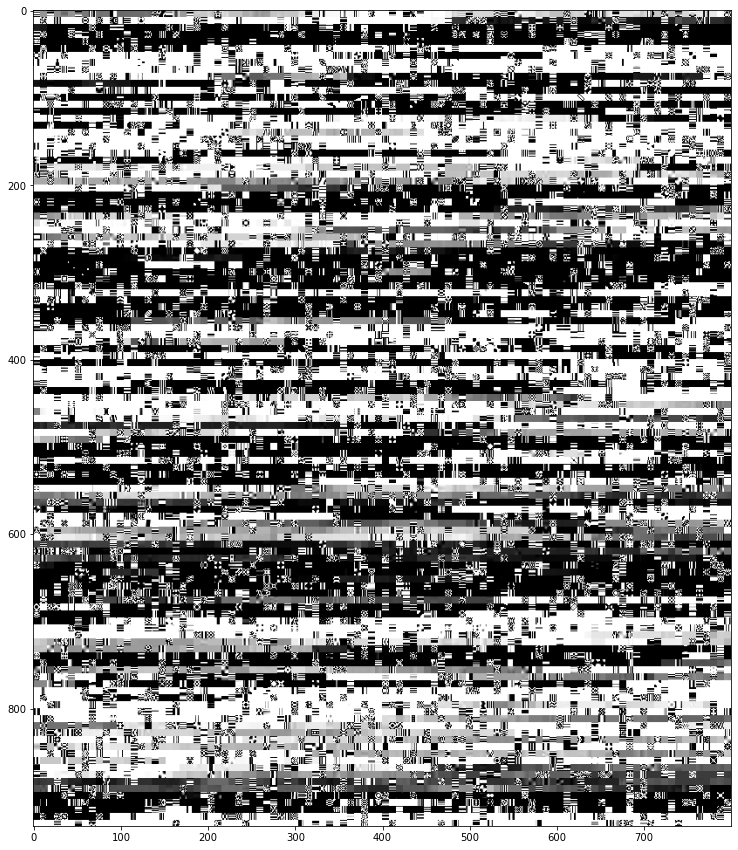

-----------------------------------
jpeg-9d/cjpeg -grayscale -baseline  -outfile output-8.jpg -huffTableMultiplier 0.85 "/Users/freder/Downloads/_work-jobs-etc/projects/jpeg-9/_output/kim.tga"


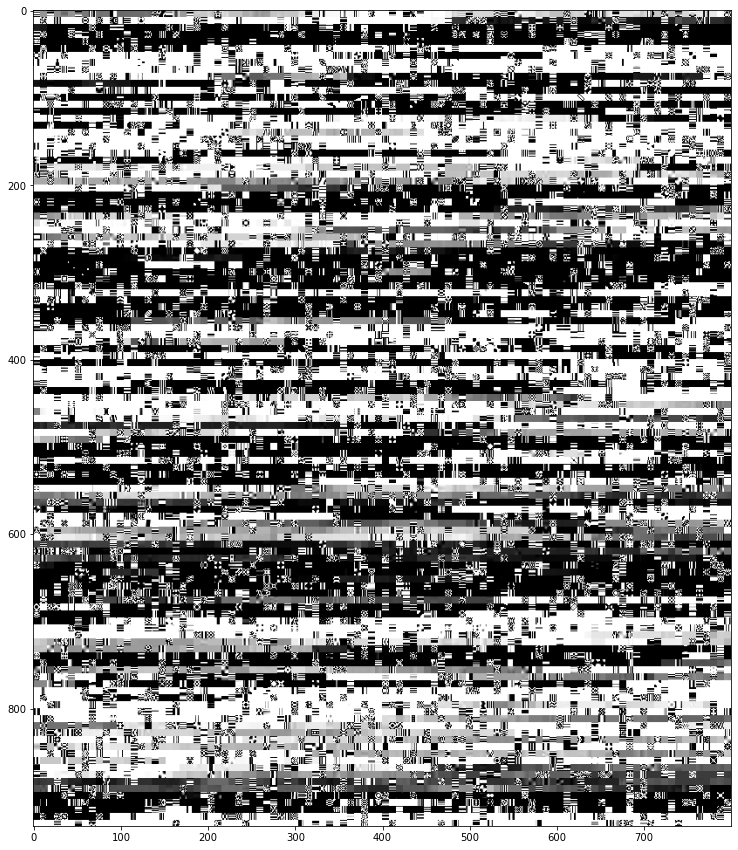

-----------------------------------
jpeg-9d/cjpeg -grayscale -baseline  -outfile output-9.jpg -huffTableMultiplier 0.85 "/Users/freder/Downloads/_work-jobs-etc/projects/jpeg-9/_output/kim.tga"


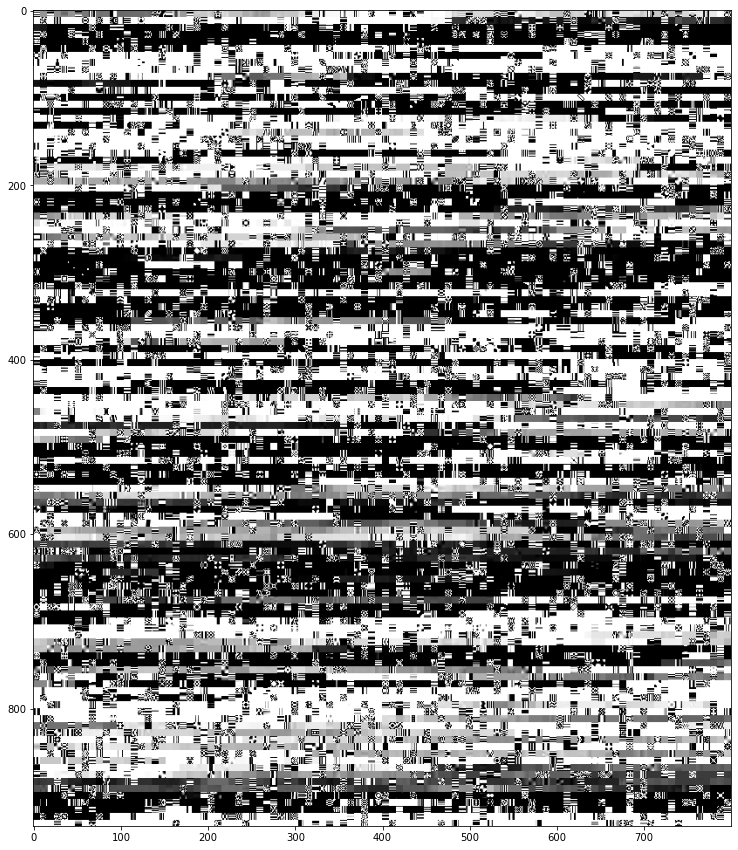

-----------------------------------


In [518]:
cjpeg = 'jpeg-9d/cjpeg'
tableFile = 'tables.txt'

inputFile = '/Users/freder/Downloads/_work-jobs-etc/projects/jpeg-9/_output/kim.tga'
# inputFile = '/Users/freder/Downloads/_work-jobs-etc/projects/schrofer-lust/sketches/sketches_f/jpeg-compression/jpeg-9/output/book.tga'
# inputFile = '/Users/freder/Downloads/_work-jobs-etc/projects/progressive-jpeg-cutoff/banana.tga'
# inputFile = '/Users/freder/Downloads/Photo on 06-10-2020 at 14.59.tga'
# inputFile = '/Users/freder/Downloads/9139a006d24520e32fe66812e9047add copy.tga'
# inputFile = '/Users/freder/Downloads/freder.tga'
# inputFile = '/Users/freder/Downloads/boy-hand-granade.tga'


def makeRandomWeight(maxRnd, offset, i):
    return int(
        offset + random() * maxRnd
    )


def makeTable(weightFn):
    vals = [
        weightFn(i)
        for i in range(8 * 8)
    ]
    return np.array(vals).reshape(8, 8)


# glitchParams = {
#     'weightFn': None,
#     'huffTableMultiplier': 0.85,
#     'dctNoise': None,
#     'quantMultiplier': None,
# }
# glitchParams = {
#     'weightFn': partial(makeRandomWeight, 50, 0),
#     'huffTableMultiplier': None,
#     'dctNoise': None,
#     'quantMultiplier': 100,
# }
# glitchParams = {
#     'weightFn': lambda i: zigzag[i],
#     'huffTableMultiplier': None,
#     'dctNoise': None,
#     'quantMultiplier': 30,
# }
# glitchParams = {
#     'weightFn': lambda i: int( ((zigzag[i] / 64) ** 1.5) * 64 ),
#     'huffTableMultiplier': None,
#     'dctNoise': 40,
#     'quantMultiplier': 10,
# }
# glitchParams = {
# #     'weightFn': lambda i: 4 + int(
# #         4 * abs(
# #             math.sin(zigzag[i] * math.pi / 64)
# #         )
# #     ),
# #     'weightFn': lambda i: int(zigzag[i] / 5),
#     'weightFn': lambda i: int( ((zigzag[i] / 64) ** 1.0) * 100 ),
#     'huffTableMultiplier': None,
#     'dctNoise': None,
#     'quantMultiplier': 20,
# }

for i in range(0, 10):
    qtables = ''
    useTables = glitchParams['weightFn'] != None
    if useTables:
        lumaMat = makeTable(glitchParams['weightFn'])
        chromaMat = makeTable(glitchParams['weightFn'])
        writeTable(lumaMat, chromaMat)
        qtables = f'-qtables "{tableFile}"'
    
    cliArgs = ' '.join([
        f'-{arg} {glitchParams[arg]}' 
        for arg in [
            'huffTableMultiplier',
            'dctNoise',
            'quantMultiplier',
        ]
        if glitchParams[arg] != None
    ])
    outFileName = f'output-{i}.jpg'
    cmd = f'{cjpeg} -grayscale -baseline {qtables} -outfile {outFileName} {cliArgs} "{inputFile}"'
    print(cmd)
    p = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = p.communicate()
    if (stdout):
        printPipeOutput(stdout)
    if (stderr):
        printPipeOutput(stdout)
    
    outImg = Image.open(outFileName)
    
    # saving again using pillow seems to 'bake' the effect
    # I assume that the finder / preview clamp values to their allowed range(?)
    finalFileName = outFileName.replace('.jpg', '-glitch.jpg')
    outImg.save(finalFileName)
    
    # store used settings as well
    with open(finalFileName.replace('.jpg', '.txt'), 'w') as f:
        weightFnStr = None
        if glitchParams['weightFn'] != None:
            if isinstance(glitchParams['weightFn'], partial):
                weightFnStr = re.sub(
                    ' at 0x[0-9a-z]+>',
                    '',
                    str(glitchParams['weightFn']).replace('<function ', '')
                )
            else:
                weightFnStr = inspect.getsource(glitchParams['weightFn']).strip().replace('\'weightFn\': ', '')[:-1]
        metadata = { 
            **glitchParams, 
            'weightFn': weightFnStr
        }
        # why does this ↓ not preserve function name in partial?
        # f.write(json.dumps(metadata))
        f.write(str(metadata))
    
    # remove old file
    os.remove(outFileName)
    
    imgArr = np.asarray(outImg)
    plt.figure(figsize=(15, 15))
    plt.imshow(imgArr, cmap='gray')
    plt.show()
    
    if useTables:
        print(lumaMat)
        print(chromaMat)
    print('-----------------------------------')